In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy

In [31]:

S0=100
r=0.05
sigma=0.2
N=49
M=365

simulation of geometric brownian motion with given parameters

Let's do the simulation of GBM.We will choose N the number of discretization points at each day obseravation equal to 49 which mean an observation each half an hour a day.We will take M=365d which correspond to the days of the year.

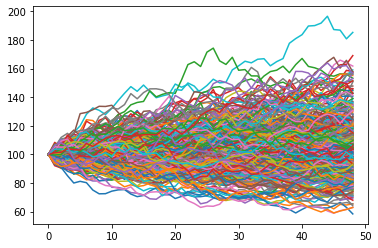

In [32]:
t= np.linspace(0,1,N)
dt=t[1]-t[0]
S = np.zeros((M,N))
S[:,0]=S0
for i in range(1,N):
  dW = np.sqrt(dt)*np.random.randn(M);
  S[:,i]= S[:,i-1]+r*S[:,i-1]*dt+sigma*S[:,i-1]*dW
for i in range(M):
  plt.plot(S[i,:])
plt.show()

We will use the likelihood method to fit the parameters of SDE with the data

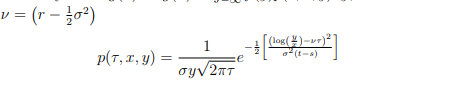

In [29]:
def loglikelihood(mu,sigma):
  loglikeli=0
  dt = t[1]-t[0]
  v = r-0.5*sigma**2 
  for j in range(M):
    for i in range(1,N):
      y= S[j,i]
      x = S[j,i-1]
      loglikeli = loglikeli + np.log((1/(sigma*y*np.sqrt(2*np.pi*dt))*np.exp(-0.5*((np.log(y/x)-v*dt)**2/(sigma**2*(dt)))))+10**(-45))
  return loglikeli

In [33]:
options = {'maxiter': 250, 'gtol': 1e-06, 'xtol': 1e-04, 'verbose': 1}
function_to_optimize = lambda w :-loglikelihood(w[0],w[1])
method = 'trust-constr'  # optimization method to use
res = scipy.optimize.minimize(lambda w: function_to_optimize(w),(0.01,0.8),tol=5e-02,method=method,bounds=((0,1),(0,1)),options=options)


/usr/local/lib/python3.7/dist-packages/scipy/optimize/_hessian_update_strategy.py:187: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  'approximations.', UserWarning)


`xtol` termination condition is satisfied.
Number of iterations: 27, function evaluations: 69, CG iterations: 29, optimality: 6.82e-04, constraint violation: 0.00e+00, execution time:  8.3 s.


In [34]:
res.x

array([0.21377206, 0.19912999])

We can see that the likelikmethod on Geometric brownian motion gave us an return rate of 0.21 which is far large than the theorical one (0.05) although the volatility given was 0.199 which is a good estimation of the theoritical one (0.2)
